## Libraries

In [1]:
import pandas as pd
import numpy as np
import math
import requests
import os
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt
from random import random
from datetime import datetime
from sklearn.preprocessing import OneHotEncoder


## Download TSE files

In [2]:
# set current directory and change to folder "raw_data"
current_dir_orig = os.getcwd()
os.chdir(f"{current_dir_orig}/raw_data")

In [3]:
def download_files(zipp):
    
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36'}
    
    for file_name, url in zipp:
        
        download = requests.get(url, headers=headers, stream=True)
        open(f"{file_name}", 'wb').write(download.content)
    

url_prest_contas = 'https://cdn.tse.jus.br/estatistica/sead/odsele/prestacao_contas/prestacao_de_contas_eleitorais_candidatos_2022.zip'
url_candidatos = 'https://cdn.tse.jus.br/estatistica/sead/odsele/consulta_cand/consulta_cand_2022.zip'
url_vagas = 'https://cdn.tse.jus.br/estatistica/sead/odsele/consulta_vagas/consulta_vagas_2022.zip'

zipfiles_names = ['prestacao_de_contas_eleitorais_candidatos_2022.zip', 'consulta_cand_2022.zip', 'consulta_vagas_2022.zip']
urls = [url_prest_contas, url_candidatos, url_vagas]

current_dir = os.getcwd()

# criteria to download only once
if len(os.listdir(current_dir)) == 0:
    download_files(zip(zipfiles_names, urls))
else:
    pass


## Import Data

In [4]:
files = os.listdir(current_dir)

zip_list = [zipfile.ZipFile(file) for file in files]

candidatos_relevant_files = ['consulta_cand_2022_BRASIL.csv']
vagas_relevant_files = ['consulta_vagas_2022_BRASIL.csv']
prestcontas_relevant_files = ['receitas_candidatos_2022_BRASIL.csv', 'despesas_contratadas_candidatos_2022_BRASIL.csv']


In [5]:
# columns of interest

cols_candidatos = ['ANO_ELEICAO',
                   'DS_ELEICAO',
                   'SG_UE',
                   'DS_CARGO',
                   'SQ_CANDIDATO',
                   'NR_CANDIDATO',
                   'NM_CANDIDATO',
                   'NR_PARTIDO',
                   'SG_PARTIDO',
                   'NM_PARTIDO',
                   'DS_NACIONALIDADE',
                   'NR_IDADE_DATA_POSSE',
                   'DS_GENERO',
                   'DS_GRAU_INSTRUCAO',
                   'DS_ESTADO_CIVIL',
                   'DS_COR_RACA',
                   'DS_OCUPACAO',
                   'DS_SIT_TOT_TURNO',
                   'ST_CANDIDATO_INSERIDO_URNA',
                   'ST_REELEICAO'
                   ]

cols_vagas = ['ANO_ELEICAO',
              'DS_ELEICAO',
              'SG_UE',
              'DS_CARGO',
              'QT_VAGAS'
             ]


cols_receitas = ['ANO_ELEICAO',
               'DS_ELEICAO',
               'TP_PRESTACAO_CONTAS',
               'SQ_PRESTADOR_CONTAS',
               'SG_UE',
               'NR_CNPJ_PRESTADOR_CONTA',
               'DS_CARGO',
               'SQ_CANDIDATO',
               'NR_CANDIDATO',
               'NM_CANDIDATO',
               'NR_PARTIDO',
               'SG_PARTIDO',
               'NM_PARTIDO',
               'DS_FONTE_RECEITA',
               'DS_ORIGEM_RECEITA',
               'DS_ESPECIE_RECEITA',
               'NR_CPF_CNPJ_DOADOR',
               'NM_DOADOR_RFB',
               'DT_RECEITA',
               'VR_RECEITA'
               ]

cols_despesas = ['ANO_ELEICAO',
                'DS_ELEICAO',
                'TP_PRESTACAO_CONTAS',
                'SQ_PRESTADOR_CONTAS',
                'SG_UE',
                'NR_CNPJ_PRESTADOR_CONTA',
                'DS_CARGO',
                'SQ_CANDIDATO',
                'NR_CANDIDATO',
                'NM_CANDIDATO',
                'NR_PARTIDO',
                'SG_PARTIDO',
                'NM_PARTIDO',
                'DS_TIPO_FORNECEDOR',
                'NR_CPF_CNPJ_FORNECEDOR',
                'NM_FORNECEDOR_RFB',
                'DS_ORIGEM_DESPESA',
                'DT_DESPESA',
                'VR_DESPESA_CONTRATADA'
               ]

cols_eleitos = ['ds_cargo',
                 'nr_candidato',
                 'nm_candidato',
                 'sg_partido',
                 'sg_ue',
                 'sq_candidato',
                 'qt_votos_nom_validos'
                ]


candidatos_df = pd.read_csv(zip_list[0].open(candidatos_relevant_files[0]),
                            sep = ';',
                            usecols = cols_candidatos,
                            encoding = 'windows-1252'
                            )

vagas_df = pd.read_csv(zip_list[1].open(vagas_relevant_files[0]),
                       sep = ';',
                       usecols = cols_vagas,
                       encoding = 'windows-1252'
                       )

receitas_df = pd.read_csv(zip_list[2].open(prestcontas_relevant_files[0]),
                        sep = ';',
                        usecols = cols_receitas,
                        encoding = 'windows-1252'
                        )

despesas_df = pd.read_csv(zip_list[2].open(prestcontas_relevant_files[1]),
                         sep = ';',
                         usecols = cols_despesas,
                         encoding = 'windows-1252'
                         )

# change to original directory
os.chdir(current_dir_orig)

eleitos_df = pd.read_csv(r'./support_files/eleitas_eleitos-região_presidente_2022.csv',
                          sep = ';',
                          usecols = cols_eleitos,
                          encoding = 'windows-1252'
                          )


## Exploratory Data Analysis

In [6]:
# see all columns
pd.set_option('display.max_columns', None)

In [7]:
candidatos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29314 entries, 0 to 29313
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ANO_ELEICAO                 29314 non-null  int64  
 1   DS_ELEICAO                  29314 non-null  object 
 2   SG_UE                       29314 non-null  object 
 3   DS_CARGO                    29314 non-null  object 
 4   SQ_CANDIDATO                29314 non-null  int64  
 5   NR_CANDIDATO                29314 non-null  int64  
 6   NM_CANDIDATO                29314 non-null  object 
 7   NR_PARTIDO                  29314 non-null  int64  
 8   SG_PARTIDO                  29314 non-null  object 
 9   NM_PARTIDO                  29314 non-null  object 
 10  DS_NACIONALIDADE            29314 non-null  object 
 11  NR_IDADE_DATA_POSSE         29289 non-null  float64
 12  DS_GENERO                   29314 non-null  object 
 13  DS_GRAU_INSTRUCAO           293

In [8]:
candidatos_df.head()

,ANO_ELEICAO,DS_ELEICAO,SG_UE,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,DS_NACIONALIDADE,NR_IDADE_DATA_POSSE,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO,DS_SIT_TOT_TURNO,ST_REELEICAO,ST_CANDIDATO_INSERIDO_URNA
0,2022,Eleições Gerais Estaduais 2022,DF,DEPUTADO FEDERAL,70001650385,1123,CELY LANGAMER MUNIZ,11,PP,PROGRESSISTAS,BRASILEIRA NATA,51.0,FEMININO,SUPERIOR COMPLETO,CASADO(A),BRANCA,PROFESSOR DE ENSINO DE PRIMEIRO E SEGUNDO GRAUS,NÃO ELEITO,N,SIM
1,2022,Eleições Gerais Estaduais 2022,PE,DEPUTADO FEDERAL,170001618619,1167,MARCOS BEZERRA CAMPELO,11,PP,PROGRESSISTAS,BRASILEIRA NATA,55.0,MASCULINO,SUPERIOR COMPLETO,CASADO(A),PARDA,OUTROS,SUPLENTE,N,SIM
2,2022,Eleições Gerais Estaduais 2022,RO,DEPUTADO ESTADUAL,220001647615,35355,DIHESSICA DAYANE FERREIRA DA SILVA,35,PMB,PARTIDO DA MULHER BRASILEIRA,BRASILEIRA NATA,25.0,FEMININO,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),PARDA,OUTROS,NÃO ELEITO,N,SIM
3,2022,Eleições Gerais Estaduais 2022,RO,DEPUTADO FEDERAL,220001605554,4456,MARY TERESINHA BRAGANHOL,44,UNIÃO,UNIÃO BRASIL,BRASILEIRA NATA,58.0,FEMININO,SUPERIOR COMPLETO,SOLTEIRO(A),BRANCA,SERVIDOR PÚBLICO ESTADUAL,SUPLENTE,N,SIM
4,2022,Eleições Gerais Estaduais 2022,RJ,DEPUTADO ESTADUAL,190001613885,33337,ROBERTA PATRÍCIA DA SILVA ALMEIDA,33,PMN,PARTIDO DA MOBILIZAÇÃO NACIONAL,BRASILEIRA NATA,47.0,FEMININO,ENSINO FUNDAMENTAL INCOMPLETO,SOLTEIRO(A),BRANCA,DONA DE CASA,SUPLENTE,N,SIM


In [9]:
vagas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ANO_ELEICAO  109 non-null    int64 
 1   DS_ELEICAO   109 non-null    object
 2   SG_UE        109 non-null    object
 3   DS_CARGO     109 non-null    object
 4   QT_VAGAS     109 non-null    int64 
dtypes: int64(2), object(3)
memory usage: 4.4+ KB


In [10]:
vagas_df.head()

,ANO_ELEICAO,DS_ELEICAO,SG_UE,DS_CARGO,QT_VAGAS
0,2022,Eleição Geral Federal 2022,BR,Presidente,1
1,2022,Eleições Gerais Estaduais 2022,AL,Governador,1
2,2022,Eleições Gerais Estaduais 2022,AL,Senador,1
3,2022,Eleições Gerais Estaduais 2022,AL,Deputado Federal,9
4,2022,Eleições Gerais Estaduais 2022,AL,Deputado Estadual,27


In [11]:
receitas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653273 entries, 0 to 653272
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   ANO_ELEICAO              653273 non-null  int64 
 1   DS_ELEICAO               653273 non-null  object
 2   TP_PRESTACAO_CONTAS      653273 non-null  object
 3   SQ_PRESTADOR_CONTAS      653273 non-null  int64 
 4   SG_UE                    653273 non-null  object
 5   NR_CNPJ_PRESTADOR_CONTA  653273 non-null  int64 
 6   DS_CARGO                 653273 non-null  object
 7   SQ_CANDIDATO             653273 non-null  int64 
 8   NR_CANDIDATO             653273 non-null  int64 
 9   NM_CANDIDATO             653273 non-null  object
 10  NR_PARTIDO               653273 non-null  int64 
 11  SG_PARTIDO               653273 non-null  object
 12  NM_PARTIDO               653273 non-null  object
 13  DS_FONTE_RECEITA         653273 non-null  object
 14  DS_ORIGEM_RECEITA   

In [12]:
print(receitas_df.shape)
receitas_df.head()

(653273, 20)


,ANO_ELEICAO,DS_ELEICAO,TP_PRESTACAO_CONTAS,SQ_PRESTADOR_CONTAS,SG_UE,NR_CNPJ_PRESTADOR_CONTA,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,DS_FONTE_RECEITA,DS_ORIGEM_RECEITA,DS_ESPECIE_RECEITA,NR_CPF_CNPJ_DOADOR,NM_DOADOR_RFB,DT_RECEITA,VR_RECEITA
0,2022,Eleições Gerais Estaduais 2022,RELATÓRIO FINANCEIRO,3796037695,SP,47552212000145,Deputado Federal,250001651724,4427,REINALDO MONTEIRO DA SILVA,44,UNIÃO,UNIÃO BRASIL,OUTROS RECURSOS,Recursos próprios,PIX,16653258874,REINALDO MONTEIRO DA SILVA,29/08/2022,"461,75"
1,2022,Eleições Gerais Estaduais 2022,RELATÓRIO FINANCEIRO,3796037695,SP,47552212000145,Deputado Federal,250001651724,4427,REINALDO MONTEIRO DA SILVA,44,UNIÃO,UNIÃO BRASIL,OUTROS RECURSOS,Recursos próprios,PIX,16653258874,REINALDO MONTEIRO DA SILVA,22/08/2022,"187,30"
2,2022,Eleições Gerais Estaduais 2022,RELATÓRIO FINANCEIRO,3785019283,SC,47497189000133,Deputado Estadual,240001616209,44117,MARIA CRISTINA CORREA CLEMENTE,44,UNIÃO,UNIÃO BRASIL,OUTROS RECURSOS,Recursos próprios,PIX,90908910991,MARIA CRISTINA CORREA CLEMENTE,18/08/2022,"400,00"
3,2022,Eleições Gerais Estaduais 2022,RELATÓRIO FINANCEIRO,3785019283,SC,47497189000133,Deputado Estadual,240001616209,44117,MARIA CRISTINA CORREA CLEMENTE,44,UNIÃO,UNIÃO BRASIL,OUTROS RECURSOS,Recursos próprios,PIX,90908910991,MARIA CRISTINA CORREA CLEMENTE,18/08/2022,"200,00"
4,2022,Eleições Gerais Estaduais 2022,RELATÓRIO FINANCEIRO,3778701223,MS,47464846000146,Deputado Federal,120001609244,4444,SINDOLEY LUIZ DE SOUZA MORAIS,44,UNIÃO,UNIÃO BRASIL,OUTROS RECURSOS,Recursos próprios,Transferência eletrônica,97652911168,SINDOLEY LUIZ DE SOUZA MORAIS,09/09/2022,"2511,00"


In [13]:
despesas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994977 entries, 0 to 1994976
Data columns (total 19 columns):
 #   Column                   Dtype 
---  ------                   ----- 
 0   ANO_ELEICAO              int64 
 1   DS_ELEICAO               object
 2   TP_PRESTACAO_CONTAS      object
 3   SQ_PRESTADOR_CONTAS      int64 
 4   SG_UE                    object
 5   NR_CNPJ_PRESTADOR_CONTA  int64 
 6   DS_CARGO                 object
 7   SQ_CANDIDATO             int64 
 8   NR_CANDIDATO             int64 
 9   NM_CANDIDATO             object
 10  NR_PARTIDO               int64 
 11  SG_PARTIDO               object
 12  NM_PARTIDO               object
 13  DS_TIPO_FORNECEDOR       object
 14  NR_CPF_CNPJ_FORNECEDOR   int64 
 15  NM_FORNECEDOR_RFB        object
 16  DS_ORIGEM_DESPESA        object
 17  DT_DESPESA               object
 18  VR_DESPESA_CONTRATADA    object
dtypes: int64(7), object(12)
memory usage: 289.2+ MB


In [14]:
print(despesas_df.shape)
despesas_df.head()

(1994977, 19)


,ANO_ELEICAO,DS_ELEICAO,TP_PRESTACAO_CONTAS,SQ_PRESTADOR_CONTAS,SG_UE,NR_CNPJ_PRESTADOR_CONTA,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,DS_TIPO_FORNECEDOR,NR_CPF_CNPJ_FORNECEDOR,NM_FORNECEDOR_RFB,DS_ORIGEM_DESPESA,DT_DESPESA,VR_DESPESA_CONTRATADA
0,2022,Eleições Gerais Estaduais 2022,Final,3793673304,AC,47547980000100,Deputado Federal,10001642333,1515,JESSICA ROJAS SALES,15,MDB,Movimento Democrático Brasileiro,Pessoa Física,65149203220,AMARILIO SARAIVA DE OLIVEIRA,Atividades de militância e mobilização de rua,22/08/2022,"4000,00"
1,2022,Eleições Gerais Estaduais 2022,Final,3783868250,AC,47493579000135,Deputado Federal,10001613550,1331,LEONARDO CUNHA DE BRITO,13,PT,Partido dos Trabalhadores,Pessoa Física,6457176224,IRANILDO MATIAS DOS SANTOS,Atividades de militância e mobilização de rua,03/09/2022,"500,00"
2,2022,Eleições Gerais Estaduais 2022,Final,3783868250,AC,47493579000135,Deputado Federal,10001613550,1331,LEONARDO CUNHA DE BRITO,13,PT,Partido dos Trabalhadores,Pessoa Física,6457176224,IRANILDO MATIAS DOS SANTOS,Atividades de militância e mobilização de rua,03/09/2022,"500,00"
3,2022,Eleições Gerais Estaduais 2022,Final,3783868250,AC,47493579000135,Deputado Federal,10001613550,1331,LEONARDO CUNHA DE BRITO,13,PT,Partido dos Trabalhadores,Pessoa Física,6457176224,IRANILDO MATIAS DOS SANTOS,Atividades de militância e mobilização de rua,03/09/2022,"500,00"
4,2022,Eleições Gerais Estaduais 2022,Final,3791359992,AC,47529158000117,Deputado Estadual,10001635541,10000,JAMYL ASFURY MARTINS OLIVEIRA,10,REPUBLICANOS,REPUBLICANOS,Pessoa Física,1822169267,UEBERTON JUNIOR NAVA DA SILVA,Atividades de militância e mobilização de rua,18/08/2022,"1200,00"


In [15]:
eleitos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 513 entries, 0 to 512
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ds_cargo              513 non-null    object
 1   nr_candidato          513 non-null    int64 
 2   nm_candidato          513 non-null    object
 3   sg_partido            513 non-null    object
 4   sg_ue                 513 non-null    object
 5   sq_candidato          513 non-null    int64 
 6   qt_votos_nom_validos  513 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 28.2+ KB


In [16]:
print(eleitos_df.shape)
eleitos_df.head()

(513, 7)


,ds_cargo,nr_candidato,nm_candidato,sg_partido,sg_ue,sq_candidato,qt_votos_nom_validos
0,Deputado Federal,1101,MARIA DO SOCORRO NERI MEDEIROS DE SOUZA,PP,AC,10001621643,25842
1,Deputado Federal,4455,ROZIMEIRE RIBEIRO ANDRADE,UNIÃO,AC,10001612486,21285
2,Deputado Federal,4422,ULYSSES FREITAS PEREIRA DE ARAUJO,UNIÃO,AC,10001612487,21075
3,Deputado Federal,1122,JOSÉ ESTEPHAN BARBARY FILHO,PP,AC,10001621646,19958
4,Deputado Federal,1111,GEHLEN DINIZ ANDRADE,PP,AC,10001621650,19560


## Data Wrangling

In [17]:
# drop candidates with null values in the column
candidatos_df.dropna(axis=0, how="any", subset=['NR_IDADE_DATA_POSSE'], inplace=True)
candidatos_df['NR_IDADE_DATA_POSSE'] = candidatos_df['NR_IDADE_DATA_POSSE'].astype(np.int32)

In [18]:
candidatos_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29289 entries, 0 to 29313
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ANO_ELEICAO                 29289 non-null  int64 
 1   DS_ELEICAO                  29289 non-null  object
 2   SG_UE                       29289 non-null  object
 3   DS_CARGO                    29289 non-null  object
 4   SQ_CANDIDATO                29289 non-null  int64 
 5   NR_CANDIDATO                29289 non-null  int64 
 6   NM_CANDIDATO                29289 non-null  object
 7   NR_PARTIDO                  29289 non-null  int64 
 8   SG_PARTIDO                  29289 non-null  object
 9   NM_PARTIDO                  29289 non-null  object
 10  DS_NACIONALIDADE            29289 non-null  object
 11  NR_IDADE_DATA_POSSE         29289 non-null  int32 
 12  DS_GENERO                   29289 non-null  object
 13  DS_GRAU_INSTRUCAO           29289 non-null  ob

In [19]:
candidatos_df.head()

,ANO_ELEICAO,DS_ELEICAO,SG_UE,DS_CARGO,SQ_CANDIDATO,NR_CANDIDATO,NM_CANDIDATO,NR_PARTIDO,SG_PARTIDO,NM_PARTIDO,DS_NACIONALIDADE,NR_IDADE_DATA_POSSE,DS_GENERO,DS_GRAU_INSTRUCAO,DS_ESTADO_CIVIL,DS_COR_RACA,DS_OCUPACAO,DS_SIT_TOT_TURNO,ST_REELEICAO,ST_CANDIDATO_INSERIDO_URNA
0,2022,Eleições Gerais Estaduais 2022,DF,DEPUTADO FEDERAL,70001650385,1123,CELY LANGAMER MUNIZ,11,PP,PROGRESSISTAS,BRASILEIRA NATA,51,FEMININO,SUPERIOR COMPLETO,CASADO(A),BRANCA,PROFESSOR DE ENSINO DE PRIMEIRO E SEGUNDO GRAUS,NÃO ELEITO,N,SIM
1,2022,Eleições Gerais Estaduais 2022,PE,DEPUTADO FEDERAL,170001618619,1167,MARCOS BEZERRA CAMPELO,11,PP,PROGRESSISTAS,BRASILEIRA NATA,55,MASCULINO,SUPERIOR COMPLETO,CASADO(A),PARDA,OUTROS,SUPLENTE,N,SIM
2,2022,Eleições Gerais Estaduais 2022,RO,DEPUTADO ESTADUAL,220001647615,35355,DIHESSICA DAYANE FERREIRA DA SILVA,35,PMB,PARTIDO DA MULHER BRASILEIRA,BRASILEIRA NATA,25,FEMININO,ENSINO MÉDIO COMPLETO,SOLTEIRO(A),PARDA,OUTROS,NÃO ELEITO,N,SIM
3,2022,Eleições Gerais Estaduais 2022,RO,DEPUTADO FEDERAL,220001605554,4456,MARY TERESINHA BRAGANHOL,44,UNIÃO,UNIÃO BRASIL,BRASILEIRA NATA,58,FEMININO,SUPERIOR COMPLETO,SOLTEIRO(A),BRANCA,SERVIDOR PÚBLICO ESTADUAL,SUPLENTE,N,SIM
4,2022,Eleições Gerais Estaduais 2022,RJ,DEPUTADO ESTADUAL,190001613885,33337,ROBERTA PATRÍCIA DA SILVA ALMEIDA,33,PMN,PARTIDO DA MOBILIZAÇÃO NACIONAL,BRASILEIRA NATA,47,FEMININO,ENSINO FUNDAMENTAL INCOMPLETO,SOLTEIRO(A),BRANCA,DONA DE CASA,SUPLENTE,N,SIM


In [20]:
# convert column VR_RECEITA from object to float
receitas_df['VR_RECEITA'] = receitas_df['VR_RECEITA'].str.replace(',', '.').astype(float)
despesas_df['VR_DESPESA_CONTRATADA'] = despesas_df['VR_DESPESA_CONTRATADA'].str.replace(',', '.').astype(float)

# convert string to date format
receitas_df['DT_RECEITA'] = pd.to_datetime(receitas_df['DT_RECEITA'], dayfirst = True, format = "%d/%m/%Y")
despesas_df['DT_DESPESA'] = pd.to_datetime(despesas_df['DT_DESPESA'], dayfirst = True, format = "%d/%m/%Y")


In [21]:
receitas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653273 entries, 0 to 653272
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   ANO_ELEICAO              653273 non-null  int64         
 1   DS_ELEICAO               653273 non-null  object        
 2   TP_PRESTACAO_CONTAS      653273 non-null  object        
 3   SQ_PRESTADOR_CONTAS      653273 non-null  int64         
 4   SG_UE                    653273 non-null  object        
 5   NR_CNPJ_PRESTADOR_CONTA  653273 non-null  int64         
 6   DS_CARGO                 653273 non-null  object        
 7   SQ_CANDIDATO             653273 non-null  int64         
 8   NR_CANDIDATO             653273 non-null  int64         
 9   NM_CANDIDATO             653273 non-null  object        
 10  NR_PARTIDO               653273 non-null  int64         
 11  SG_PARTIDO               653273 non-null  object        
 12  NM_PARTIDO      

In [22]:
despesas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994977 entries, 0 to 1994976
Data columns (total 19 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   ANO_ELEICAO              int64         
 1   DS_ELEICAO               object        
 2   TP_PRESTACAO_CONTAS      object        
 3   SQ_PRESTADOR_CONTAS      int64         
 4   SG_UE                    object        
 5   NR_CNPJ_PRESTADOR_CONTA  int64         
 6   DS_CARGO                 object        
 7   SQ_CANDIDATO             int64         
 8   NR_CANDIDATO             int64         
 9   NM_CANDIDATO             object        
 10  NR_PARTIDO               int64         
 11  SG_PARTIDO               object        
 12  NM_PARTIDO               object        
 13  DS_TIPO_FORNECEDOR       object        
 14  NR_CPF_CNPJ_FORNECEDOR   int64         
 15  NM_FORNECEDOR_RFB        object        
 16  DS_ORIGEM_DESPESA        object        
 17  DT_DESPESA               da

In [23]:
header_electeds = [name.upper() for name in eleitos_df.columns]

eleitos_df.rename(dict(zip(list(eleitos_df.columns),header_electeds)), axis=1, inplace=True)


In [24]:
eleitos_df.head()

,DS_CARGO,NR_CANDIDATO,NM_CANDIDATO,SG_PARTIDO,SG_UE,SQ_CANDIDATO,QT_VOTOS_NOM_VALIDOS
0,Deputado Federal,1101,MARIA DO SOCORRO NERI MEDEIROS DE SOUZA,PP,AC,10001621643,25842
1,Deputado Federal,4455,ROZIMEIRE RIBEIRO ANDRADE,UNIÃO,AC,10001612486,21285
2,Deputado Federal,4422,ULYSSES FREITAS PEREIRA DE ARAUJO,UNIÃO,AC,10001612487,21075
3,Deputado Federal,1122,JOSÉ ESTEPHAN BARBARY FILHO,PP,AC,10001621646,19958
4,Deputado Federal,1111,GEHLEN DINIZ ANDRADE,PP,AC,10001621650,19560


## Avaliando previsoes

In [25]:
# importa csv com previsoes
previsoes_df = pd.read_csv(r"./dataset/depfed_pred_df.csv")

previsoes_df = pd.merge(previsoes_df, candidatos_df[["SQ_CANDIDATO", "SG_PARTIDO", "SG_UE"]], on="SQ_CANDIDATO", how='left')

previsoes_df["RECEITA_TOTAL"] = previsoes_df["RECEITA_TOTAL"]/1000

eleitos = previsoes_df.loc[previsoes_df["ST_ELEITORAL"] == 1.0]
eleitos_e_pred_naoeleitos = previsoes_df.loc[(previsoes_df["ST_ELEITORAL"] == 1.0) & (previsoes_df["ST_ELEITORAL_PRED"] == 0)]
eleitos_e_pred_naoeleitos.sort_values("RECEITA_TOTAL", ignore_index=True).head()

# previsoes_df.loc[previsoes_df["NM_CANDIDATO"] == "KIM PATROCA KATAGUIRI"]

,SQ_CANDIDATO,NM_CANDIDATO,NR_IDADE_DATA_POSSE,REELEICAO,ST_ELEITORAL,COR_RACA_AMARELA,COR_RACA_BRANCA,COR_RACA_INDIGENA,COR_RACA_NAO_INFORMADO,COR_RACA_PARDA,COR_RACA_PRETA,GENERO,FUNDO ESPECIAL,OUTROS RECURSOS,FUNDO PARTIDARIO,RAZAO_CAND_VAGA_UE,RAZAO_CANDPART_VAGAS_UE,PART_PRES_POS,INSTA_FLW,TK_FLW,TK_LIKE,FB_FLW,TWT_FLW,QT_VAGAS_UE,QUOCIENTE_ELEITORAL_UE,RECEITA_TOTAL,FLW_TOTAL,Y_PRED,ST_ELEITORAL_PRED,SG_PARTIDO,SG_UE
0,260001737580,ICARO BARBOSA COSTA,21,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,33900.00,0.0,19.625000,1.125000,0.4,15500,0,0,0,0,8.0,148884.0,33.90000,15500,0.234228,0,PL,SE
1,190001738867,ROBERTO LUIZ RODRIGUES DE OLIVEIRA,66,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,14410.00,50000.0,22.891304,1.000000,0.4,29200,674,2490,43000,454,46.0,186435.0,64.41000,73328,0.277332,0,PL,RJ
2,210001596133,MAURICIO BEDIN MARCON,36,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,71745.02,0.0,16.903226,0.903226,0.0,95900,158400,1600000,365000,24300,31.0,198381.0,71.74502,643600,0.422395,0,PODE,RS
3,190001609683,JOSE PORTUGAL NETO,46,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,100000.0,0.00,0.0,22.891304,1.021739,0.0,6996,36,179,1000,170,46.0,186435.0,100.00000,8202,0.010437,0,PODE,RJ
4,200001602999,EVANDRO GONÇALVES DA SILVA JUNIOR,38,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,100000.0,12243.00,2000.0,22.000000,1.125000,0.4,47600,1400,4800,2000,46,8.0,233103.0,114.24300,51046,0.180870,0,PL,RN


### Idade

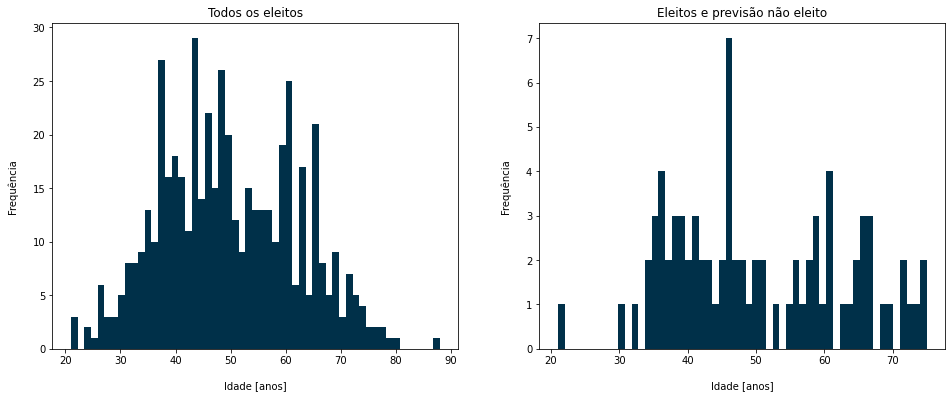

In [26]:
# Plot
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

axs[0].hist(eleitos['NR_IDADE_DATA_POSSE'], bins=55, alpha=1.0, color=['#003049'])
axs[0].set_title('Todos os eleitos')

axs[1].hist(eleitos_e_pred_naoeleitos['NR_IDADE_DATA_POSSE'], bins=55, alpha=1.0, color=['#003049'])
axs[1].set_title('Eleitos e previsão não eleito')

for ax in axs.flat:
    ax.set(xlabel = 'Idade [anos]', ylabel = 'Frequência')
    ax.xaxis.labelpad = 15
    ax.yaxis.labelpad = 15

plt.show() 

### Receita e Reeleição

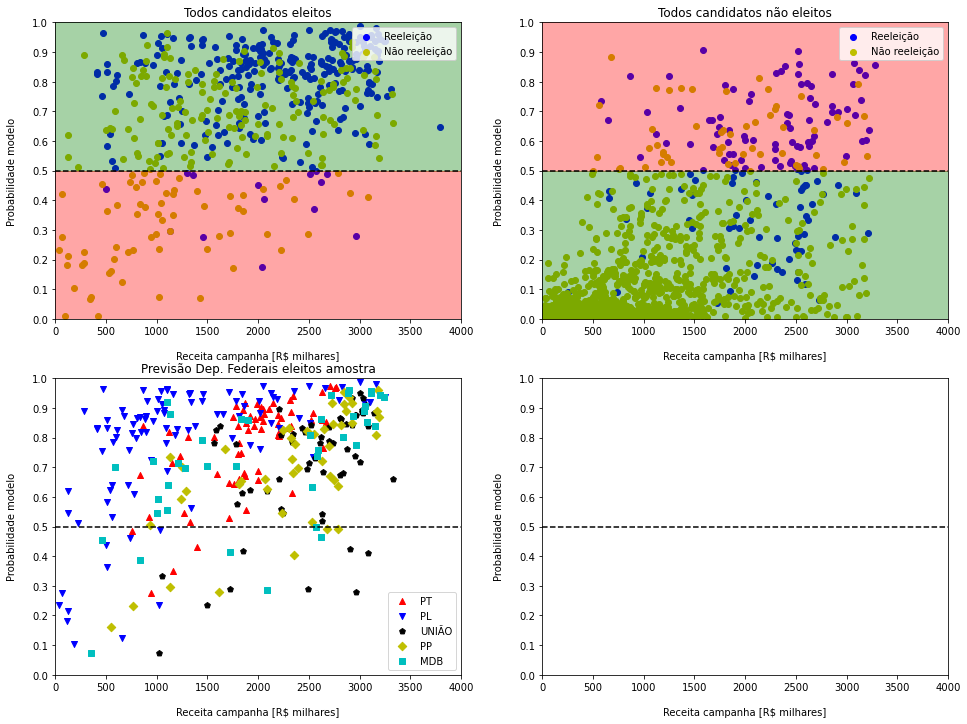

In [27]:
# Plot [0 0]
eleitos_preveleitos_reeleicao = previsoes_df.loc[(previsoes_df["ST_ELEITORAL"] == 1.0)
                                                 & (previsoes_df["REELEICAO"] == 1.0)]

eleitos_prevnaoeleitos_reeleicao = previsoes_df.loc[(previsoes_df["ST_ELEITORAL"] == 1.0)
                                                    & (previsoes_df["REELEICAO"] == 0.0)]

# Plot [0 1]
naoeleitos_preveleitos_reeleicao = previsoes_df.loc[(previsoes_df["ST_ELEITORAL"] == 0.0)
                                                 & (previsoes_df["REELEICAO"] == 1.0)]

naoeleitos_prevnaoeleitos_reeleicao = previsoes_df.loc[(previsoes_df["ST_ELEITORAL"] == 0.0)
                                                    & (previsoes_df["REELEICAO"] == 0.0)]

# todos eleitos filtrados por PT e PL
eleitos_pred_PT = previsoes_df.loc[(previsoes_df["ST_ELEITORAL"] == 1.0) & (previsoes_df["SG_PARTIDO"] == "PT")]
eleitos_pred_PL = previsoes_df.loc[(previsoes_df["ST_ELEITORAL"] == 1.0) & (previsoes_df["SG_PARTIDO"] == "PL")]
eleitos_pred_UNIAO = previsoes_df.loc[(previsoes_df["ST_ELEITORAL"] == 1.0) & (previsoes_df["SG_PARTIDO"] == "UNIÃO")]
eleitos_pred_PP = previsoes_df.loc[(previsoes_df["ST_ELEITORAL"] == 1.0) & (previsoes_df["SG_PARTIDO"] == "PP")]
eleitos_pred_MDB = previsoes_df.loc[(previsoes_df["ST_ELEITORAL"] == 1.0) & (previsoes_df["SG_PARTIDO"] == "MDB")]


# Plot [0 0]
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
axs[0, 0].scatter(eleitos_preveleitos_reeleicao["RECEITA_TOTAL"], eleitos_preveleitos_reeleicao["Y_PRED"], c="b")
axs[0, 0].scatter(eleitos_prevnaoeleitos_reeleicao["RECEITA_TOTAL"], eleitos_prevnaoeleitos_reeleicao["Y_PRED"], c="y")
axs[0, 0].set_title("Todos candidatos eleitos")
axs[0, 0].legend(["Reeleição", "Não reeleição"], loc="upper right")
axs[0, 0].axhspan(0.5, 1.0, xmin=0, xmax=5000, color="g", alpha=0.35)
axs[0, 0].axhspan(0.0, 0.5, xmin=0, xmax=5000, color="r", alpha=0.35)

# Plot [1 0]
axs[0, 1].scatter(naoeleitos_preveleitos_reeleicao["RECEITA_TOTAL"], naoeleitos_preveleitos_reeleicao["Y_PRED"], c="b")
axs[0, 1].scatter(naoeleitos_prevnaoeleitos_reeleicao["RECEITA_TOTAL"], naoeleitos_prevnaoeleitos_reeleicao["Y_PRED"], c="y")
axs[0, 1].set_title("Todos candidatos não eleitos")
axs[0, 1].legend(["Reeleição", "Não reeleição"], loc="upper right")
axs[0, 1].axhspan(0.5, 1.0, xmin=0, xmax=5000, color="r", alpha=0.35)
axs[0, 1].axhspan(0.0, 0.5, xmin=0, xmax=5000, color="g", alpha=0.35)

# Plot [0 1]
axs[1, 0].scatter(eleitos_pred_PT["RECEITA_TOTAL"], eleitos_pred_PT["Y_PRED"], c="r", marker="^")
axs[1, 0].scatter(eleitos_pred_PL["RECEITA_TOTAL"], eleitos_pred_PL["Y_PRED"], c="b", marker="v")
axs[1, 0].scatter(eleitos_pred_UNIAO["RECEITA_TOTAL"], eleitos_pred_UNIAO["Y_PRED"], c="black", marker="p")
axs[1, 0].scatter(eleitos_pred_PP["RECEITA_TOTAL"], eleitos_pred_PP["Y_PRED"], c="y", marker="D")
axs[1, 0].scatter(eleitos_pred_MDB["RECEITA_TOTAL"], eleitos_pred_MDB["Y_PRED"], c="c", marker="s")
axs[1, 0].set_title("Previsão Dep. Federais eleitos amostra")
axs[1, 0].legend(["PT", "PL", "UNIÃO", "PP", "MDB"], loc="lower right")

for ax in axs.flat:
    ax.set(xlabel = "Receita campanha [R$ milhares]", ylabel = "Probabilidade modelo")
    ax.set_ylim([0.0, 1.0])
    ax.set_xlim([0.0, 4000])
    ax.set_yticks(np.linspace(0.0, 1.0, 11))
    ax.plot([0, 4000], [0.5, 0.5], "k--")
    ax.xaxis.labelpad = 15
    ax.yaxis.labelpad = 15

### Receita e Gênero

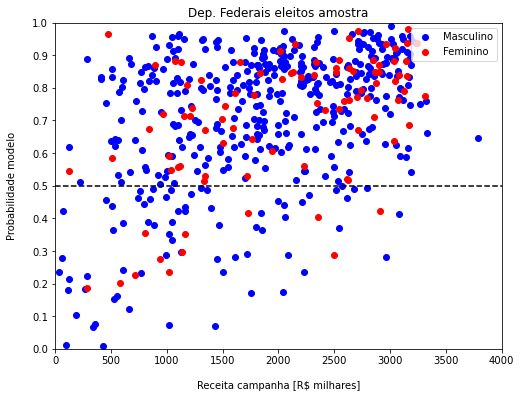

In [30]:
# todos os eleitos
eleitos_masculino = previsoes_df.loc[(previsoes_df["ST_ELEITORAL"] == 1.0) & (previsoes_df["GENERO"] == 1.0)]
eleitos_feminino = previsoes_df.loc[(previsoes_df["ST_ELEITORAL"] == 1.0) & (previsoes_df["GENERO"] == 0.0)]

# Plot
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))

axs.scatter(eleitos_masculino["RECEITA_TOTAL"], eleitos_masculino["Y_PRED"], c="b")
axs.scatter(eleitos_feminino["RECEITA_TOTAL"], eleitos_feminino["Y_PRED"], c="r")
axs.set_title("Dep. Federais eleitos amostra")
axs.legend(["Masculino", "Feminino"], loc="upper right")

axs.set(xlabel = "Receita campanha [R$ milhares]", ylabel = "Probabilidade modelo")
axs.set_ylim([0.0, 1.0])
axs.set_xlim([0.0, 4000])
axs.set_yticks(np.linspace(0.0, 1.0, 11))
axs.plot([0, 4000], [0.5, 0.5], "k--")
axs.xaxis.labelpad = 15
axs.yaxis.labelpad = 15

plt.show()

### Razão candidato/vaga por UE

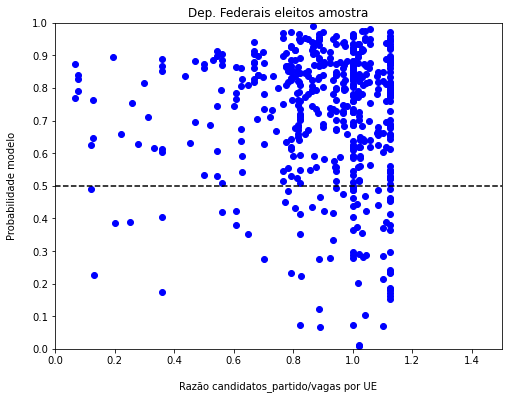

In [29]:
# todos os eleitos
eleitos = previsoes_df.loc[(previsoes_df["ST_ELEITORAL"] == 1.0)]

# Plot
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))

axs.scatter(eleitos["RAZAO_CANDPART_VAGAS_UE"], eleitos["Y_PRED"], c="b")
axs.plot([0, 1.5], [0.5, 0.5], "k--")
axs.set_title("Dep. Federais eleitos amostra")

axs.set(xlabel = "Razão candidatos_partido/vagas por UE", ylabel = "Probabilidade modelo")
axs.set_ylim([0.0, 1.0])
axs.set_xlim([0.0, 1.5])
axs.set_yticks(np.linspace(0.0, 1.0, 11))
axs.xaxis.labelpad = 15
axs.yaxis.labelpad = 15

plt.show()